In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68983_U')

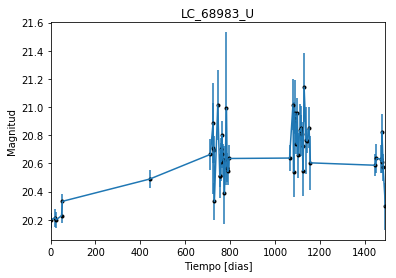

In [2]:
data = np.genfromtxt('LC_68983_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68983_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

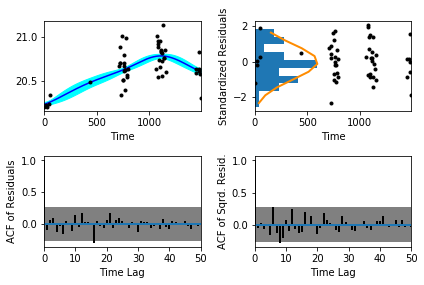

In [5]:
sample.assess_fit()

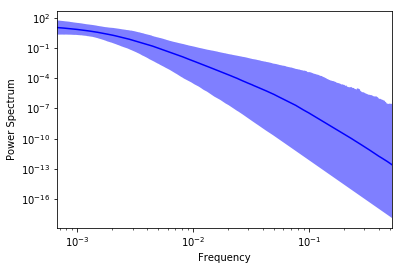

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68983_U')

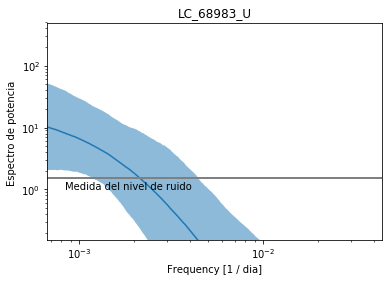

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68983_U')

Text(0.5,1,'Prediccion , valor esperado LC_68983_U')

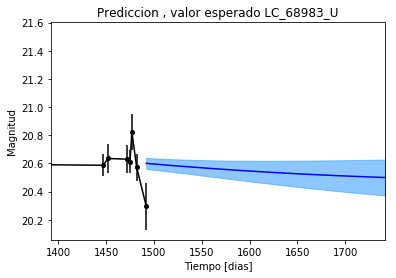

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68983_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_68983_U')

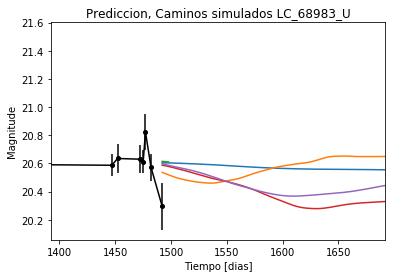

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68983_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68983_U')

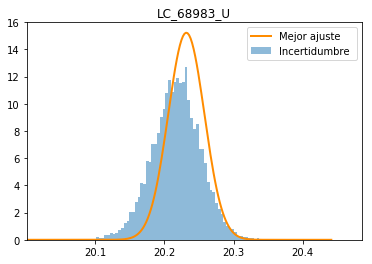

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68983_U')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_U')

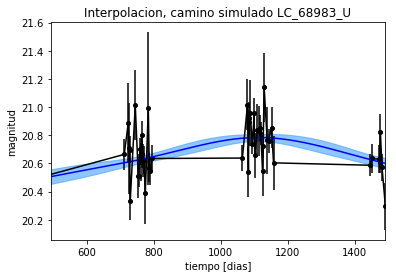

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_U')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_U')

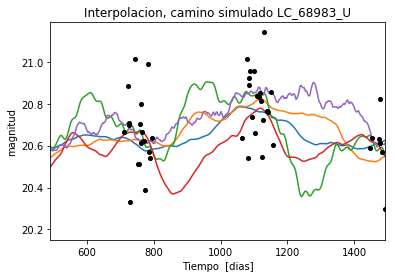

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 506.441486469
Median: 0.0127602085029
Standard deviation: 0.206358847555
68% credibility interval: [ 0.00118627  0.22233749]
95% credibility interval: [  7.17622820e-04   7.98019537e-01]
99% credibility interval: [  6.77946501e-04   9.95313392e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 451.70195164
Median: 0.00157411816134
Standard deviation: 0.0584290085588
68% credibility interval: [ 0.00081112  0.01278602]
95% credibility interval: [ 0.00068347  0.12990987]
99% credibility interval: [ 0.00067324  0.44039091]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 419.206418763
Median: 0.0183148322389
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 911.961929378
Median: 47.9960399594
Standard deviation: 1.62778035703
68% credibility interval: [ 46.17184799  49.19681689]
95% credibility interval: [ 43.68731188  49.95625963]
99% credibility interval: [ 41.54528594  50.25182931]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 487.517811747
Median: 0.681976601241
Standard deviation: 2.04753252188
68% credibility interval: [ 0.07650992  3.85838325]
95% credibility interval: [ 0.02488371  6.82418329]
99% credibility interval: [ 0.02049438  9.36532035]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 487.674279478
Median: 0.175536080468
Standard deviation: 6.35159564512
68% credibility interval: [ 0.01045215  3.35954262]
95% credibility interval: [  9.13259311e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6104.90928141
Median: 3.41669484283e-26
Standard deviation: 7.58401362189e+98
68% credibility interval: [  6.91988517e-52   4.02332899e-05]
95% credibility interval: [  9.61072473e-80   3.13181787e+01]
99% credibility interval: [  2.13989221e-82   4.18382248e+95]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1439.2255184
Median: 20.5248079491
Standard deviation: 0.127086385854
68% credibility interval: [ 20.41215911  20.62703088]
95% credibility interval: [ 20.24113906  20.7474151 ]
99% credibility interval: [ 20.06246409  20.85635048]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 338.906175319
Median: 0.000462969711811
Standard deviation: 0.184651449093
68% credibility interval: [ 0.          0.14050874]
95% credibility interval: [ 0.          0.74239279]
99% credibility interval: [ 0.          0.96873158]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 338.906175319
Median: 0.000462969711811
Standard deviation: 0.184651449093
68% credibility interval: [ 0.          0.14050874]
95% credibility interval: [ 0.          0.74239279]
99% credibility interval: [ 0.          0.96873158]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 711.865887751
Median: 0.0
Standard deviation: 0.000612054663439
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 911.961929378
Median: 47.9960399594
Standard deviation: 1.62778035703
68% credibility interval: [ 46.17184799  49.19681689]
95% credibility interval: [ 43.68731188  49.95625963]
99% credibility interval: [ 41.54528594  50.25182931]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1447.15526991
Median: 0.0390546445191
Standard deviation: 0.0523049759619
68% credibility interval: [ 0.02247793  0.07978701]
95% credibility interval: [ 0.01370711  0.18303743]
99% credibility interval: [ 0.01034699  0.32783597]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1688.20727514
Median: 1.01321588645
Standard deviation: 0.152929685257
68% credibility interval: [ 0.88041213  1.17310892]
95% credibility interval: [ 0.76746065  1.38726924]
99% credibility interval: [ 0.71141008  1.51285087]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2212.99554871
Median: 5.2419112277e-05
Standard deviation: 0.0589502518805
68% credibility interval: [  1.67382357e-06   1.87827475e-03]
95% credibility interval: [  3.50799088e-08   2.81474165e-02]
99% credibility interval: [  3.48237583e-100   2.30438240e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 506.441486469
Median: (-0.0801747545823-1.4845154427j)
Standard deviation: 1.73988800154
68% credibility interval: [-1.39698766+0.j         -0.00745354-0.01436041j]
95% credibility interval: [ -5.01410463e+00+0.j          -4.50895716e-03-0.00217851j]
99% credibility interval: [ -6.25373848e+00+0.j          -4.25966349e-03-0.00112353j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 451.70195164
Median: (-0.00989047610308+0.00968622911737j)
Standard deviation: 1.21689755379
68% credibility interval: [-0.08033694+0.44798987j -0.00509645+0.00080698j]
95% credibility interval: [-0.81624778+2.86283488j -0.00429438+0.01493067j]
99% credibility interval: [-2.76705767+3.11591618j -0.00423007+0.00999483j]
Posterior summary for 